# Questions to answer
Which factors will increase the survival rate of people on Titanics?
1. Will the survival rate change through ages?
2. Will people's income affect their survival rate?
3. What is the difference of survival rate between male and female?
4. Will people with a big family have a higher possibility to survive? (The different impact of siblings/spoueses and parents/children)
5. Will the survival rate differ for people from different location?
6. Will the weak in the rich family more likely to survive?

Additionally, I will study to what extent will these factors affect the survival rate through logistic regression.

# Data wangling

In [1]:
import numpy as np
import pandas as pd
survival_pd=pd.read_csv('titanic-data.csv')
print survival_pd.head(1),'\n'
print survival_pd.describe(),'\n'

#Inspect if there is any missing data in each column
print survival_pd.info(),'\n'

print '"Sex" missing value number: ',survival_pd['Sex'].isnull().sum()
print '"Embarked" missing value number: ',survival_pd['Embarked'].isnull().sum()

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S   

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.6

#### From the result above, we mainly have two findings:
1. We have Age and Embarked which involves missing data, and we will work on it then
2. The minimun value of Fare is 0, which is very wired for people to pay nothing for a ticket. We will investigate on it later.

In [2]:
#Replace the missing age with mean
survival_pd['Age']=survival_pd['Age'].fillna(survival_pd['Age'].mean())
survival_pd.describe()

#Add Age_class to classify the ages for data investigation
bins=np.arange(0,90,10)
survival_pd['Classed_age']=pd.cut(survival_pd['Age'],bins)

print survival_pd.groupby(survival_pd['Classed_age'])['PassengerId'].count(),'\n'

Classed_age
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64 



In [3]:
#Filter out the lines whose embarked value is absent
non_missing_survival=survival_pd[survival_pd['Embarked'].notnull()]
non_missing_survival.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Check on the lines whose fare equals to 0
free_fare_passenger=survival_pd[survival_pd['Fare']==0]
print free_fare_passenger,'\n'

#These passengers are all with no siblings/spouses and children/parents, and they embarked from Southampton. 
#I am not sure if they are the ticket escaper or it's due to the statistical error. 
#To avoid mistake, I will exclude these lines when calculating the relationship between wealth and survival rate.

paid_survival=survival_pd[survival_pd['Fare']>0]
print paid_survival.info(),'\n'

non_missing_paid_survival=non_missing_survival[non_missing_survival['Fare']>0]
print non_missing_paid_survival.info()

     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robe

# Data Exploration

### Will the survival rate change through ages?

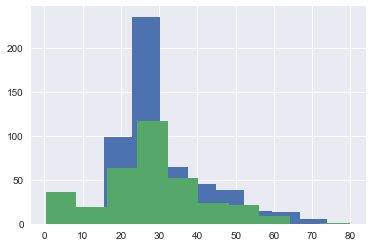

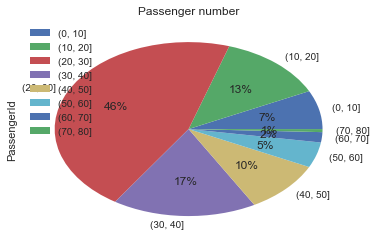

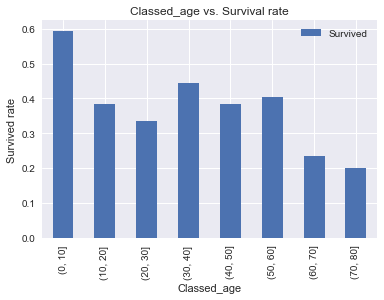

Pearson's R equals to:  -0.0698


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

survived=survival_pd[survival_pd['Survived']==1]
non_survived=survival_pd[survival_pd['Survived']==0]
plt.hist(non_survived['Age'])
plt.hist(survived['Age'])
plt.show()

def plotpie(datalist,variable):
    datalist.groupby(variable)['PassengerId'].count().plot(kind='pie',legend=True,autopct='%.0f%%')
    plt.title('Passenger number')
    plt.show()
    
def plotbar(datalist,variable):
    datalist.groupby(variable)['Survived'].mean().plot(kind='bar',legend=True)
    plt.title(variable + ' vs. Survival rate')
    plt.ylabel('Survived rate')
    plt.xlabel(variable)
    plt.show()

#print 'Survival rate of different age group',survival_pd.groupby(['Classed_age']).mean()['Survived'],'\n'

plotpie(survival_pd,'Classed_age')
plotbar(survival_pd,'Classed_age')

survival_pd['Std_age']=(survival_pd['Age']-survival_pd['Age'].mean())/survival_pd['Age'].std(ddof=0)
survival_pd['Std_survived']=(survival_pd['Survived']-survival_pd['Survived'].mean())/survival_pd['Survived'].std(ddof=0)
r=(survival_pd['Std_age']*survival_pd['Std_survived']).mean()
print "Pearson's R equals to: ",round(r,4)

#### By comparing the survival rate among different age group, we can see that there is a rough trend that the survival rate is decreasing with the increase of age, but this data fluctuate among different age groups. So we calculate the pearson's r to further evaluate the correlation between age and survival rate, and get the number very close to 0. So we can conclude that the survival rate is not significantly related to age.

## Will people's income affect their survival rate?

Survival rate among passengers from different cabins Pclass
1    211
2    178
3    487
Name: Survived, dtype: int64 



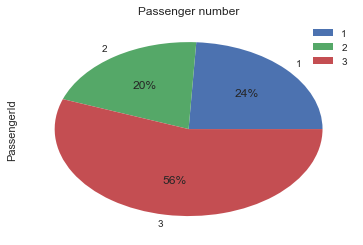

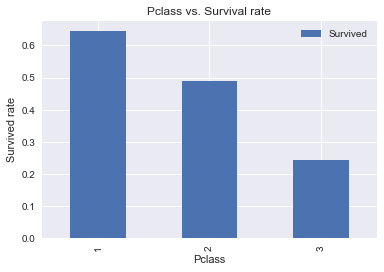

Pearsons R equals to:  0.2525


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
print 'Survival rate among passengers from different cabins',paid_survival.groupby(['Pclass']).count()['Survived'],'\n'

plotpie(paid_survival,'Pclass')
plotbar(paid_survival,'Pclass')

paid_survival['Std_Fare']=(paid_survival['Fare']-paid_survival['Fare'].mean())/paid_survival['Fare'].std(ddof=0)
paid_survival['Std_survived']=(paid_survival['Survived']-paid_survival['Survived'].mean())/paid_survival['Survived'].std(ddof=0)
r=(paid_survival['Std_Fare']*paid_survival['Std_survived']).mean()
print 'Pearsons R equals to: ',round(r,4)

#### We can find a very clear trend that people from the first-class cabin have a higher rate of survival comparing with those from the second-class and third-class. On the other hand, the Person's R rate is 0.25. Considering that there are many other factors influencing the survival rate on Titanics. R value can drive to the conclusion that the survival rate is related to people's wealth.

## What is the difference of survival rate between male and female?

The survival rate of male and female Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 



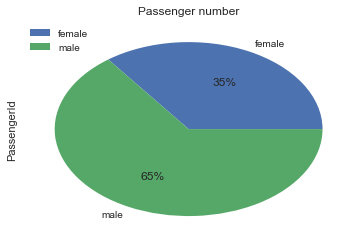

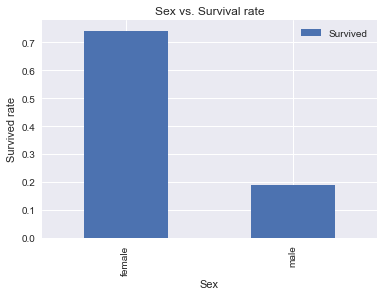

LeveneResult(statistic=5.8041006326174953, pvalue=0.016191248809611765)
Ttest_indResult(statistic=-18.67183317725917, pvalue=2.2836009226010537e-61)


In [10]:
print 'The survival rate of male and female',survival_pd.groupby(['Sex']).mean()['Survived'],'\n'

plotpie(survival_pd,'Sex')
plotbar(survival_pd,'Sex')

from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy import stats

A=survival_pd[survival_pd['Sex']=='male']['Survived']
B=survival_pd[survival_pd['Sex']=='female']['Survived']
print levene(A,B)

print ttest_ind(A,B,equal_var=False)

#### From the describing result above, we can see that the survival rate of female is far higher than male. Then we further study it through t-test, as p is lower than 0.05. We can conclude that the women's survival rate is significantly higher than men.

# Will People from a larger family have a higher possibility to survive?

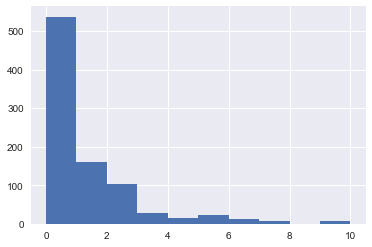

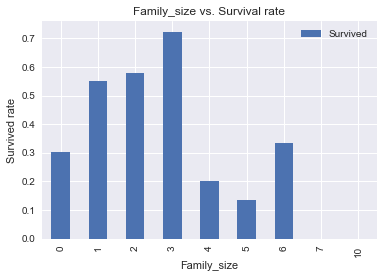

Person's R equals to:  0.0166


In [11]:
survival_pd['Family_size']=survival_pd['SibSp']+survival_pd['Parch']

plt.hist(survival_pd['Family_size'])
plt.show()

plotbar(survival_pd,'Family_size')

def correlation_datalist(a,b):
    std_data1=(a-a.mean())/a.std(ddof=0)
    std_data2=(b-b.mean())/b.std(ddof=0)
    return (std_data1*std_data2).mean()

print "Person's R equals to: " ,round(correlation_datalist(survival_pd['Family_size'],survival_pd['Survived']),4)

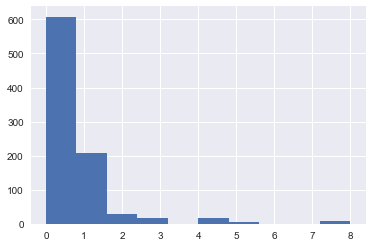

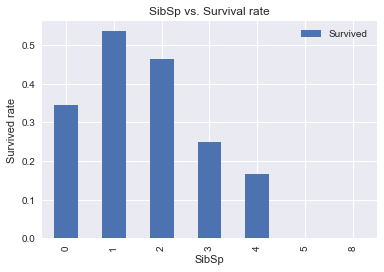

Person's R equals to:  -0.0353


In [12]:
plt.hist(survival_pd['SibSp'])
plt.show()

plotbar(survival_pd,'SibSp')

print "Person's R equals to: " ,round(correlation_datalist(survival_pd['SibSp'],survival_pd['Survived']),4)

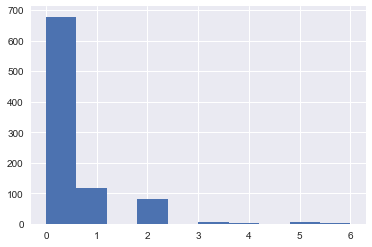

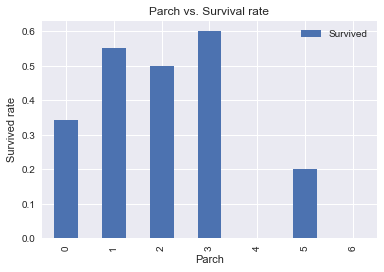

Person's R equals to:  0.0816


In [13]:
plt.hist(survival_pd['Parch'])
plt.show()

plotbar(survival_pd,'Parch')

print "Person's R equals to: " ,round(correlation_datalist(survival_pd['Parch'],survival_pd['Survived']),4)

#### From the Pearson's r value above, we can conclude that the passengers with parents and children are more likely to survive. As the R value is very close to 0 for survival rate and Sibling/Spouse number, there is no significant relationship between them. From the bar chart, there is no clear trend that the survival rate is related to the number of family size or parents/children. When it comes to the relationship with SibSp, as the dataset number is small for big family, it is hard to make the conclusion then. So the Person's R value is not so accountable here.

## Will the survival rate differ for people from different location?

Survival rate for people embarking from different locations Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64 



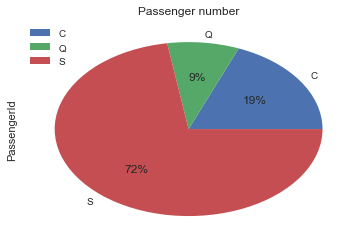

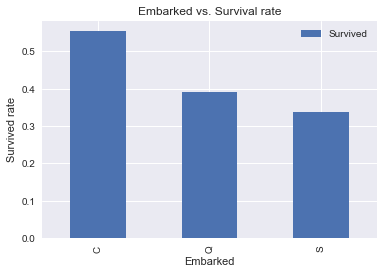

S and Q LeveneResult(statistic=0.84528082656661607, pvalue=0.3581991404267767)
S and C LeveneResult(statistic=6.9762961630163902, pvalue=0.0084188256749561565)
C and Q LeveneResult(statistic=0.6923076923076924, pvalue=0.40619747946157658) 

S and Q Ttest_indResult(statistic=-0.91939155236853032, pvalue=0.35819914042689849)
S and C Ttest_indResult(statistic=-5.067405592401621, pvalue=7.8260001625411252e-07)
C and Q Ttest_indResult(statistic=2.4010594208034917, pvalue=0.017100079516725354)


In [15]:
print 'Survival rate for people embarking from different locations',non_missing_survival.groupby('Embarked').mean()['Survived'],'\n'

plotpie(non_missing_survival,'Embarked')
plotbar(non_missing_survival,'Embarked')

S=non_missing_survival[non_missing_survival['Embarked']=='S']['Survived']
Q=non_missing_survival[non_missing_survival['Embarked']=='Q']['Survived']
C=non_missing_survival[non_missing_survival['Embarked']=='C']['Survived']

print "S and Q",levene(S,Q)
print "S and C",levene(S,C)
print "C and Q",levene(C,Q),'\n'

print 'S and Q',ttest_ind(S,Q,equal_var=True)
print 'S and C',ttest_ind(S,C,equal_var=False)
print 'C and Q',ttest_ind(C,Q,equal_var=True)

#### Through the barchart, we find that the survival rate is high in Cherbourg than that of the Queenstown and Southampton. But I'm not sure if it takes place by accident. So we read the result of t-test to further check. From the t-test result above, we can conclude that the survival rate of passengers embarked from Cherbourg are significantly higher than those from Queenstown and Southampton.

# Will weak in the rich family more likely to survive?

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked Classed_age  Std_Fare  Std_survived  
0      0  A/5 21171  7.25   NaN        S    (20, 30]  -0.51105     -0.798363   

Survival rate Pclass  Sex   
1       female    0.968085
        male      0.384615
2       female    0.921053
        male      0.166667
3       female    0.500000
        male      0.134111
Name: Survived, dtype: float64 



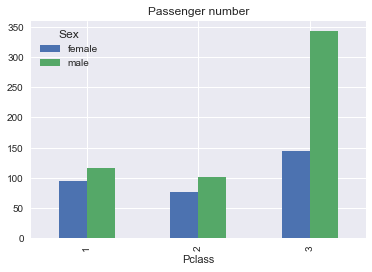

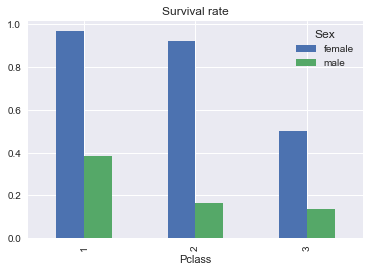

F1 and F2 LeveneResult(statistic=1.8524243170071377, pvalue=0.17532456129616583)
F2 and F3 LeveneResult(statistic=347.89402597402608, pvalue=4.7891708726984285e-47)
F1 and F3 LeveneResult(statistic=1012.6054113953277, pvalue=2.4295926704359399e-87) 

M1 and M2 LeveneResult(statistic=13.419048018628459, pvalue=0.00031304679749044373)
M2 and M3 LeveneResult(statistic=0.68363242258604151, pvalue=0.40878382859349949)
M1 and M3 LeveneResult(statistic=37.133504669617729, pvalue=2.341954644192293e-09) 

F1 and F2 Ttest_indResult(statistic=1.361037955755511, pvalue=0.17532456129616714)
F2 and F3 Ttest_indResult(statistic=8.0766110759306748, pvalue=4.5091339236710645e-14)
F1 and F3 Ttest_indResult(statistic=10.262284582752971, pvalue=5.6477052819398876e-20) 

M1 and M2 Ttest_indResult(statistic=3.7292782995073201, pvalue=0.00024602896476030986)
M2 and M3 Ttest_indResult(statistic=0.78620774148289485, pvalue=0.43295185928864832)
M1 and M3 Ttest_indResult(statistic=5.134900856078028, pvalue=8.290

In [16]:
print paid_survival.head(1),'\n'

print 'Survival rate',paid_survival.groupby(['Pclass','Sex']).mean()['Survived'],'\n'

paid_survival.groupby(['Pclass','Sex'])['PassengerId'].count().unstack().plot(kind='bar')
plt.title('Passenger number')
plt.show()

paid_survival.groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Survival rate')
plt.show()

F1=paid_survival[(paid_survival['Pclass']==1)&(paid_survival['Sex']=='female')]['Survived']
F2=paid_survival[(paid_survival['Pclass']==2)&(paid_survival['Sex']=='female')]['Survived']
F3=paid_survival[(paid_survival['Pclass']==3)&(paid_survival['Sex']=='female')]['Survived']

M1=paid_survival[(paid_survival['Pclass']==1)&(paid_survival['Sex']=='male')]['Survived']
M2=paid_survival[(paid_survival['Pclass']==2)&(paid_survival['Sex']=='male')]['Survived']
M3=paid_survival[(paid_survival['Pclass']==3)&(paid_survival['Sex']=='male')]['Survived']

print 'F1 and F2',levene(F1,F2)
print 'F2 and F3',levene(F2,F3)
print 'F1 and F3',levene(F1,F3),'\n'

print 'M1 and M2',levene(M1,M2)
print 'M2 and M3',levene(M2,M3)
print 'M1 and M3',levene(M1,M3),'\n'

print 'F1 and F2',ttest_ind(F1,F2,equal_var=True)
print 'F2 and F3',ttest_ind(F2,F3,equal_var=False)
print 'F1 and F3',ttest_ind(F1,F3,equal_var=False),'\n'

print 'M1 and M2',ttest_ind(M1,M2,equal_var=False)
print 'M2 and M3',ttest_ind(M2,M3,equal_var=False)
print 'M1 and M3',ttest_ind(M1,M3,equal_var=False)

#### We can see that the survival rate of women in the 3rd cabin is significantly lower than the women from the 1st and 2nd cabin. While on the other hand, the survival rate of men from the 3rd cabin is not significantly lower than men from the 2rd carbin. 

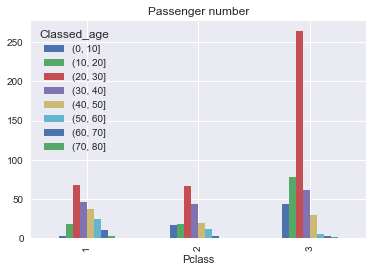

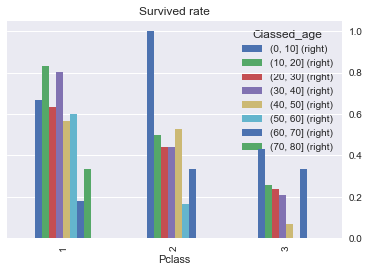

Y1 and Y2 LeveneResult(statistic=0.45689477557027219, pvalue=0.50269822563220434)
Y3 and Y2 LeveneResult(statistic=2.1294991400908425, pvalue=0.14707917950380792)
Y1 and Y3 LeveneResult(statistic=3.2576975263542431, pvalue=0.07387534711171008) 

A1 and A2 LeveneResult(statistic=2.7146150664850635, pvalue=0.10039938262876413)
A3 and A2 LeveneResult(statistic=25.672051494206439, pvalue=5.5908785842715075e-07)
A1 and A3 LeveneResult(statistic=10.432307164414006, pvalue=0.0013099888870818741) 

O1 and O2 LeveneResult(statistic=0.0, pvalue=1.0)
O3 and O2 LeveneResult(statistic=0.0, pvalue=1.0)
O1 and O3 LeveneResult(statistic=0.0, pvalue=1.0) 

Y1 and Y2 Ttest_indResult(statistic=0.67593992008925763, pvalue=0.50269822563220234)
Y2 and Y3 Ttest_indResult(statistic=-4.4743837705608014, pvalue=1.7431776190106136e-05)
Y1 and Y3 Ttest_indResult(statistic=4.1831426953580708, pvalue=5.8712058236361747e-05) 

A1 and A2 Ttest_indResult(statistic=4.1845481514570961, pvalue=3.6814987864265274e-05)
A3 

In [17]:
#print 'Survival rate',paid_survival.groupby(['Pclass','Classed_age']).mean()['Survived'],'\n'

paid_survival.groupby(['Pclass','Classed_age'])['PassengerId'].count().unstack().plot(kind='Bar',title='Passenger number')
plt.show()
paid_survival.groupby(['Pclass','Classed_age'])['Survived'].mean().unstack().plot(kind='Bar',secondary_y=True,title='Survived rate')
plt.show()

Y1=paid_survival[(paid_survival['Pclass']==1) & (paid_survival['Age']<=18)]['Survived']
Y2=paid_survival[(paid_survival['Pclass']==2) & (paid_survival['Age']<=18)]['Survived']
Y3=paid_survival[(paid_survival['Pclass']==3) & (paid_survival['Age']<=18)]['Survived']

A1=paid_survival[(paid_survival['Pclass']==1) & ((paid_survival['Age']>18) & (paid_survival['Age']<=60))]['Survived']
A2=paid_survival[(paid_survival['Pclass']==2) & ((paid_survival['Age']>18) & (paid_survival['Age']<=60))]['Survived']
A3=paid_survival[(paid_survival['Pclass']==3) & ((paid_survival['Age']>18) & (paid_survival['Age']<=60))]['Survived']

O1=paid_survival[(paid_survival['Pclass']==1) & (paid_survival['Age']>18)]['Survived']
O2=paid_survival[(paid_survival['Pclass']==1) & (paid_survival['Age']>18)]['Survived']
O3=paid_survival[(paid_survival['Pclass']==1) & (paid_survival['Age']>18)]['Survived']

print 'Y1 and Y2',levene(Y1,Y2)
print 'Y3 and Y2',levene(Y3,Y2)
print 'Y1 and Y3',levene(Y1,Y3),'\n'

print 'A1 and A2',levene(A1,A2)
print 'A3 and A2',levene(A3,A2)
print 'A1 and A3',levene(A1,A3),'\n'

print 'O1 and O2',levene(O1,O2)
print 'O3 and O2',levene(O3,O2)
print 'O1 and O3',levene(O1,O3),'\n'

print 'Y1 and Y2',ttest_ind(Y1,Y2,equal_var=True)
print 'Y2 and Y3',ttest_ind(Y3,Y2,equal_var=True)
print 'Y1 and Y3',ttest_ind(Y1,Y3,equal_var=True),'\n'

print 'A1 and A2',ttest_ind(A1,A2,equal_var=True)
print 'A3 and A2',ttest_ind(A3,A2,equal_var=True)
print 'A1 and A3',ttest_ind(A1,A3,equal_var=False),'\n'

print 'O1 and O2',ttest_ind(O1,O2,equal_var=True)
print 'O3 and O2',ttest_ind(O3,O2,equal_var=True)
print 'O1 and O3',ttest_ind(O1,O3,equal_var=True)

#### Like the difference of male and female, the survival rate of the young in the 3rd cabin is significantly lower than the young from the 1st and 2nd cabin. No significant difference of survival rate between the young from the 1st and 2nd cabin. While the survival rate of the adults in the 1st cabin is significantly higher than that of the 2nd and 3st.

#### So we can conclude that the weak (young and female)from the 3rd cabin are less likely to survive.

## At last, I'd like to use the logistic regression to see how these factors influencing the survival rate.

In [18]:
#Create dummy variable for regression
dummy_sex=pd.get_dummies(non_missing_paid_survival['Sex'],prefix='Sex')
dummy_embarked=pd.get_dummies(non_missing_paid_survival['Embarked'],prefix='Embarked')
dummy_embarked.head()

#Prepare data for regression
regression_colmn=['Age','SibSp','Parch','Fare']
data=non_missing_paid_survival[regression_colmn].join(dummy_sex.loc[:,'Sex_female']).join(dummy_embarked.loc[:,'Embarked_Q':])
data['intercept']=1

#Operate the regression
import statsmodels.api as sm
logit=sm.Logit(non_missing_paid_survival['Survived'],data)
result=logit.fit()
print result.summary()

E:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.478052
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  874
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            7
Date:                Tue, 07 Nov 2017   Pseudo R-squ.:                  0.2841
Time:                        21:58:58   Log-Likelihood:                -417.82
converged:                       True   LL-Null:                       -583.65
                                        LLR p-value:                 1.037e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0207      0.007     -2.875      0.004      -0.035      -0.007
SibSp         -0.3961      0.

#### Interestingly, through the logistic regression, we can find that age and number of siblings/spouses are significantly negatively related with survival rate, which doesn't align with my previous finding through Person's R that they are unrelated. We can further study later to figure out the reason for it. The other findings just echo with my conclusion previously.

# Conclusion
From the research above, we can come up with the conclusion as below. 

1. The survival rate is not significantly related to age. However, as we have put the mean age to fill the empty blank, we have got more samples in the 20-30 group which might lead to the mistake in the survival rate in this group. When we take the mean of group 20-30 away, the decending trend of survival rate across ages becomes more clear. So not sure whether this conclusion aligns with reality
2. People's survival rate increase as they becomes wealthier
3. Women's survival rate is significantly higher than men.
4. We can not judge whether family size is related to the survival rate as the date scale for large family is too small.
5. People embarked from Cherbourge has a higher survival rate though we cannot know the reason for it.
6. The weak from the 3rd carbin are less likely to survive.

There are 2224 passengers on Titanic,but we only get 891 data. As we don't know the reason why those data is missing and how the dataset has been collected, we cannot conclude that current finding can represent the population. Of course,if these datasets are randomly selected, we can conclude that this 891 samples can represent the 2224 population.

Ther might be many other factors that can also influence the survival rate such as people's health condition, nationality, whether they are a good swimmer and etc.. 